In [4]:
from vega import Vega
import altair as alt

import pandas as pd
artefacts_data = pd.read_csv("artefacts-overview-stats.csv")

In [2]:
artefacts_data

,institution,sector,type,topic,precision,artefact_count
0,Oxford University,university,university,mixed,estimate,22530000
1,University of Cambridge,university,university,mixed,estimate,10000000
2,Durham University,university,university,mixed,estimate,106000
3,University College London,university,university,mixed,estimate,164000
4,University of Manchester,university,university,mixed,estimate,4060000
5,King's College London,university,university,mixed,estimate,200000
6,University of Birmingham,university,university,mixed,estimate,4500000
7,Unversity of Warwick,university,university,mixed,estimate,16000
8,Manchester Metropolitan Unversity,university,university,mixed,estimate,0
9,Swansea University,university,mixed,mixed,estimate,1700


In [ ]:

alt.Chart(source).mark_arc(innerRadius=50).encode(
    theta="value",
    color="category:N",
)

In [242]:
import pandas as pd
import altair as alt

title1 = alt.TitleParams('British Library', anchor='middle')
source1 = pd.DataFrame(
                       {"institution": "Test 1",
                       "values": [1000000, 500000, 400000, 100000,
                                  450000, 400000, 200000],
                       "labels": ["Artefacts", 
                                  "Museum Objects", 
                                  "Library Items",
                                  "Archive Items/Collections", 
                                  "Museum Records", 
                                  "Library Records", "Archive Records"]
                       })

ring1 = alt.Chart(source1).mark_arc(innerRadius=90, outerRadius=100).encode(
    theta="values",
    color="labels:N",
)

ring1_text = ring1.mark_text(radiusOffset=85).encode(text="values:Q")


bar1 = alt.Chart(artefacts_data, height=20, width=200).mark_bar().encode(
    alt.X("artefact_count").title("Artefacts"),
    color=alt.condition(
        alt.FieldOneOfPredicate('institution', ['British Library']),
        alt.value('green'),     
        alt.value('gray')     
    )
)

base1 = alt.Chart(source1, width=200, title=title1).encode(
    alt.Theta("values:Q").stack(True),
    alt.Radius("values").scale(type="sqrt", zero=True, rangeMin=20),
    color=alt.Color("labels:N", sort="ascending").legend(orient="bottom", titleOrient="left"),
).properties(
    width=200,
    height=200
)

c1 = base1.mark_arc(innerRadius=50, cornerRadius=10, stroke="#fff")
c2 = base1.mark_text(radiusOffset=55).encode(text="values:Q")


title2 = alt.TitleParams('Natural History Museum', anchor='middle')
source2 = pd.DataFrame(
                       {"institution": "Test 2",
                       "values": [2000000, 1000000, 800000, 200000,
                                  600000, 800000, 50000],
                       "labels": ["Artefacts", 
                                  "Museum Objects", 
                                  "Library Items",
                                  "Archive Items/Collections", 
                                  "Museum Records", 
                                  "Library Records", "Archive Records"]
                       })
base2 = alt.Chart(source2, title=title2).encode(
    alt.Theta("values:Q").stack(True),
    alt.Radius("values").scale(type="sqrt", zero=True, rangeMin=20),
    color=alt.Color("labels:N", sort="ascending"),
).properties(
    width=200,
    height=200
)

bar2 = alt.Chart(artefacts_data, height=20, width=200).mark_bar().encode(
    alt.X("artefact_count").title("Artefacts"),
    color=alt.condition(
        alt.FieldOneOfPredicate('institution', ['Natural History Museum']),
        alt.value('green'),     
        alt.value('gray')     
    )
)

source2_ring = pd.DataFrame(
                       {"institution": "Test 2",
                       "values": [400000, 500000, 350000, 400000, 40000, 70000, 5000, 30000],
                       "catalogued": [1,0,1,0,1,0,1,0],
                       "labels": ["Artefacts Catalogued", 
                                  "Artefacts", 
                                  "Museum Objects Catalogued",
                                  "Museum Objects", 
                                  "Library Items Catalogued",
                                  "Library Items", 
                                  "Archive Items Catalogued", 
                                  "Archive Items"]
                       })
ring2 = alt.Chart(source2_ring).mark_arc(innerRadius=90, outerRadius=100).encode(
    theta="values",
    color="labels:N",
)

#ring2_text = ring2.mark_text(radiusOffset=25).encode(text="values:Q")

c3 = base2.mark_arc(innerRadius=50, cornerRadius=10, stroke="#fff")
c4 = base2.mark_text(radiusOffset=60).encode(text="values:Q")


title3 = alt.TitleParams('Royal Academy', anchor='middle')
source3 = pd.DataFrame(
                       {"institution": "Test 3",
                       "values": [1000000, 500000, 0, 0,
                                  400000, 0, 0],
                       "labels": ["Artefacts", 
                                  "Museum Objects", 
                                  "Library Items",
                                  "Archive Items/Collections", 
                                  "Museum Records", 
                                  "Library Records", "Archive Records"]
                       })
base3 = alt.Chart(source3, title=title3).encode(
    alt.Theta("values:Q").stack(True),
    alt.Radius("values").scale(type="sqrt", zero=True, rangeMin=20),
    color=alt.Color("labels:N", sort="ascending"),
    order='labels'
).properties(
    width=200,
    height=200
)

bar3 = alt.Chart(artefacts_data, height=20, width=200).mark_bar().encode(
    alt.X("artefact_count").title("Artefacts"),
    color=alt.condition(
        alt.FieldOneOfPredicate('institution', ['Royal Academy']),
        alt.value('green'),     
        alt.value('gray')     
    )
)

ring3 = alt.Chart(source3).mark_arc(innerRadius=90, outerRadius=100).encode(
    theta="values",
    color="labels:N",
)

ring3_text = ring3.mark_text(radiusOffset=25).encode(text="values:Q")

c5 = base3.mark_arc(innerRadius=50, cornerRadius=10, stroke="#fff")
c6 = base3.mark_text(radiusOffset=60).encode(text="values:Q")

institution1 = alt.vconcat((c1 + c2 + ring1), bar1).resolve_scale(theta='independent')
institution2 = alt.vconcat(alt.layer(c3, c4, ring2).resolve_scale(theta='independent'), 
                           bar2).resolve_scale(theta='independent')
alt.hconcat(institution1,  institution2,
            ((c5 + c6 + ring3) & bar3), spacing=40).configure(numberFormat='.2s').resolve_scale(
    theta='shared')
#alt.hconcat(((c1 + c2 + ring1) & bar1),  ((c3 + c4 + ring2) & bar2),
#            ((c5 + c6 + ring3) & bar3), spacing=40).configure(numberFormat='.2s').resolve_scale(
#    theta='shared')
#alt.vconcat(c1 + c2, c3 + c4, spacing=20)

alt.HConcatChart(...)

In [5]:

alt.Chart(source1).mark_arc(innerRadius=100).encode(
    theta="values",
    color="labels:N",
)


NameError: name 'source1' is not defined

In [64]:
treemap_spec = r"""{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "An example of treemap layout for hierarchical data.",
  "width": 960,
  "height": 500,
  "padding": 2.5,
  "autosize": "none",

  "signals": [
    {
      "name": "layout", "value": "squarify",
      "bind": {
        "input": "select",
        "options": [
          "squarify",
          "binary",
          "slicedice"
        ]
      }
    },
    {
      "name": "aspectRatio", "value": 1.6,
      "bind": {"input": "range", "min": 1, "max": 5, "step": 0.1}
    }
  ],

  "data": [
    {
      "name": "tree",
      "values": [ { "id": 1, "name": "Cultural Heritage" },
                 { "id": 2, "name": "Library", "parent": 1, "size": 1000 }, 
                 { "id": 3, "name": "Archive", "parent": 1, "size": 1000 },
                 { "id": 4, "name": "Museum", "parent": 1, "size": 2000 } ],
      "transform": [
        {
          "type": "stratify",
          "key": "id",
          "parentKey": "parent"
        },
        {
          "type": "treemap",
          "field": "size",
          "sort": {"field": "value"},
          "round": True,
          "method": {"signal": "layout"},
          "ratio": {"signal": "aspectRatio"},
          "size": [{"signal": "width"}, {"signal": "height"}]
        }
      ]
    },
    {
      "name": "nodes",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.children" }]
    },
    {
      "name": "leaves",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "!datum.children" }]
    }
  ],

  "scales": [
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "nodes", "field": "name"},
      "range": [
        "#3182bd", "#6baed6", "#9ecae1", "#c6dbef", "#e6550d",
        "#fd8d3c", "#fdae6b", "#fdd0a2", "#31a354", "#74c476",
        "#a1d99b", "#c7e9c0", "#756bb1", "#9e9ac8", "#bcbddc",
        "#dadaeb", "#636363", "#969696", "#bdbdbd", "#d9d9d9"
      ]
    },
    {
      "name": "size",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [256, 28, 20, 14]
    },
    {
      "name": "opacity",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [0.15, 0.5, 0.8, 1.0]
    }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data": "nodes"},
      "interactive": False,
      "encode": {
        "enter": {
          "fill": {"scale": "color", "field": "name"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"}
        }
      }
    },
    {
      "type": "rect",
      "from": {"data": "leaves"},
      "encode": {
        "enter": {
          "stroke": {"value": "#fff"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"},
          "fill": {"value": "transparent"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    },
    {
      "type": "text",
      "from": {"data": "nodes"},
      "interactive": False,
      "encode": {
        "enter": {
          "font": {"value": "Helvetica Neue, Arial"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "#000"},
          "text": {"field": "name"},
          "fontSize": {"scale": "size", "field": "depth"},
          "fillOpacity": {"scale": "opacity", "field": "depth"}
        },
        "update": {
          "x": {"signal": "0.5 * (datum.x0 + datum.x1)"},
          "y": {"signal": "0.5 * (datum.y0 + datum.y1)"}
        }
      }
    }
  ]
}
"""

In [72]:
treemap2_spec = r"""{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "An example of treemap layout for hierarchical data.",
  "width": 960,
  "height": 500,
  "padding": 2.5,
  "autosize": "none",

  "signals": [
    {
      "name": "layout", "value": "squarify",
      "bind": {
        "input": "select",
        "options": [
          "squarify",
          "binary",
          "slicedice"
        ]
      }
    },
    {
      "name": "aspectRatio", "value": 1.6,
      "bind": {"input": "range", "min": 1, "max": 5, "step": 0.1}
    }
  ],

  "data": [
    {
      "name": "tree",
      "values": [
        {"id": 1, "name": "flare"},
        {
          "id": 2,
          "name": "analyticsanalyticsanalyticsanalyticsanalyticsanalytics",
          "parent": 1
        },
        {"id": 3, "name": "clusterclusterclustercluster", "parent": 2},
        {"id": 4, "name": "AgglomerativeCluster", "parent": 3, "size": 3938},
        {"id": 5, "name": "CommunityStructure", "parent": 3, "size": 3812},
        {"id": 6, "name": "HierarchicalCluster", "parent": 3, "size": 6714},
        {"id": 7, "name": "MergeEdge", "parent": 3, "size": 743},
        {"id": 8, "name": "graph", "parent": 2},
        {"id": 9, "name": "BetweennessCentrality", "parent": 8, "size": 3534},
        {"id": 10, "name": "LinkDistance", "parent": 8, "size": 5731},
        {"id": 11, "name": "MaxFlowMinCut", "parent": 8, "size": 7840},
        {"id": 12, "name": "ShortestPaths", "parent": 8, "size": 5914},
        {"id": 13, "name": "SpanningTree", "parent": 8, "size": 3416},
        {"id": 14, "name": "optimization", "parent": 2},
        {"id": 15, "name": "AspectRatioBanker", "parent": 14, "size": 7074},
        {"id": 16, "name": "animate", "parent": 1},
        {"id": 17, "name": "Easing", "parent": 16, "size": 17010},
        {"id": 18, "name": "FunctionSequence", "parent": 16, "size": 5842},
        {"id": 19, "name": "interpolate", "parent": 16},
        {"id": 20, "name": "ArrayInterpolator", "parent": 19, "size": 1983},
        {"id": 21, "name": "ColorInterpolator", "parent": 19, "size": 2047},
        {"id": 22, "name": "DateInterpolator", "parent": 19, "size": 1375},
        {"id": 23, "name": "Interpolator", "parent": 19, "size": 8746},
        {"id": 24, "name": "MatrixInterpolator", "parent": 19, "size": 2202},
        {"id": 28, "name": "RectangleInterpolator", "parent": 19, "size": 2042},
        {"id": 33, "name": "Sequence", "parent": 16, "size": 5534},
        {"id": 34, "name": "Transition", "parent": 16, "size": 9201},
        {"id": 35, "name": "Transitioner", "parent": 16, "size": 19975},
        {"id": 36, "name": "TransitionEvent", "parent": 16, "size": 1116},
        {"id": 37, "name": "Tween", "parent": 16, "size": 6006},
        {"id": 38, "name": "data", "parent": 1},
        {"id": 39, "name": "converters", "parent": 38},
        {"id": 40, "name": "Converters", "parent": 39, "size": 721}
      ],
      "transform": [
        {
          "type": "stratify",
          "key": "id",
          "parentKey": "parent"
        },
        {
          "type": "treemap",
          "field": "size",
          "sort": {"field": "value"},
          "round": True,
          "method": {"signal": "layout"},
          "ratio": {"signal": "aspectRatio"},
          "size": [{"signal": "width"}, {"signal": "height"}]
        }
      ]
    },
    {
      "name": "nodes",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.children" }]
    },
    {
      "name": "leaves",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "!datum.children" }]
    }
  ],

  "scales": [
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "nodes", "field": "name"},
      "range": [
        "#3182bd", "#6baed6", "#9ecae1", "#c6dbef", "#e6550d",
        "#fd8d3c", "#fdae6b", "#fdd0a2", "#31a354", "#74c476",
        "#a1d99b", "#c7e9c0", "#756bb1", "#9e9ac8", "#bcbddc",
        "#dadaeb", "#636363", "#969696", "#bdbdbd", "#d9d9d9"
      ]
    },
    {
      "name": "size",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [256, 28, 20, 14]
    },
    {
      "name": "opacity",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [0.15, 0.5, 0.8, 1.0]
    }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data": "nodes"},
      "interactive": False,
      "encode": {
        "enter": {
          "fill": {"scale": "color", "field": "name"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"}
        }
      }
    },
    {
      "type": "rect",
      "from": {"data": "leaves"},
      "encode": {
        "enter": {
          "stroke": {"value": "#fff"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"},
          "fill": {"value": "transparent"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    },
    {
      "type": "text",
      "from": {"data": "nodes"},
      "interactive": False,
      "encode": {
        "enter": {
          "font": {"value": "Helvetica Neue, Arial"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "#000"},
          "text": {"field": "name"},
          "fontSize": {"scale": "size", "field": "depth"},
          "fillOpacity": {"scale": "opacity", "field": "depth"}
        },
        "update": {
          "x": {"signal": "0.5 * (datum.x0 + datum.x1)"},
          "y": {"signal": "0.5 * (datum.y0 + datum.y1)"}
        }
      }
    }
  ]
}
"""

In [79]:
treemap_test_spec = r"""
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "An example of treemap layout for hierarchical data.",
  "width": 960,
  "height": 500,
  "padding": 2.5,
  "autosize": "none",
  "signals": [
    {
      "name": "layout",
      "value": "squarify",
      "bind": {
        "input": "select",
        "options": ["squarify", "binary", "slicedice"]
      }
    },
    {
      "name": "aspectRatio",
      "value": 1.6,
      "bind": {"input": "range", "min": 1, "max": 5, "step": 0.1}
    }
  ],
  "data": [
    {
      "name": "tree",
      "values": [ { "id": 1, "name": "Cultural Heritage" },
                 { "id": 2, "name": "Library", "parent": 1, "size": 1000 }, 
                 { "id": 3, "name": "Archive", "parent": 1, "size": 1000 },
                 { "id": 4, "name": "Museum", "parent": 1, "size": 2000 } ],
      "transform": [
        {"type": "stratify", "key": "id", "parentKey": "parent"},
        {
          "type": "treemap",
          "field": "size",
          "sort": {"field": "value"},
          "round": true,
          "method": {"signal": "layout"},
          "ratio": {"signal": "aspectRatio"},
          "size": [{"signal": "width"}, {"signal": "height"}]
        }
      ]
    },
    {
      "name": "nodes",
      "source": "tree",
      "transform": [{"type": "filter", "expr": "datum.children"}]
    },
    {
      "name": "leaves",
      "source": "tree",
      "transform": [{"type": "filter", "expr": "!datum.children"}]
    }
  ],
  "scales": [
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "nodes", "field": "name"},
      "range": [
        "#3182bd",
        "#6baed6",
        "#9ecae1",
        "#c6dbef",
        "#e6550d",
        "#fd8d3c",
        "#fdae6b",
        "#fdd0a2",
        "#31a354",
        "#74c476",
        "#a1d99b",
        "#c7e9c0",
        "#756bb1",
        "#9e9ac8",
        "#bcbddc",
        "#dadaeb",
        "#636363",
        "#969696",
        "#bdbdbd",
        "#d9d9d9"
      ]
    },
    {
      "name": "size",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [256, 28, 20, 14]
    },
    {
      "name": "opacity",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [0.15, 0.5, 0.8, 1]
    }
  ],
  "marks": [
    {
      "type": "rect",
      "from": {"data": "nodes"},
      "interactive": false,
      "encode": {
        "enter": {"fill": {"scale": "color", "field": "name"}},
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"}
        }
      }
    },
    {
      "type": "rect",
      "from": {"data": "leaves"},
      "encode": {
        "enter": {"stroke": {"value": "#fff"}},
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"},
          "fill": {"value": "transparent"}
        },
        "hover": {"fill": {"value": "red"}}
      }
    },
    {
      "type": "text",
      "from": {"data": "nodes"},
      "interactive": false,
      "encode": {
        "enter": {
          "font": {"value": "Helvetica Neue, Arial"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "#000"},
          "text": {"field": "name"},
          "fontSize": {"scale": "size", "field": "depth"},
          "fillOpacity": {"scale": "opacity", "field": "depth"}
        },
        "update": {
          "x": {"signal": "0.5 * (datum.x0 + datum.x1)"},
          "y": {"signal": "0.5 * (datum.y0 + datum.y1)"}
        }
      }
    }
  ]
}
"""

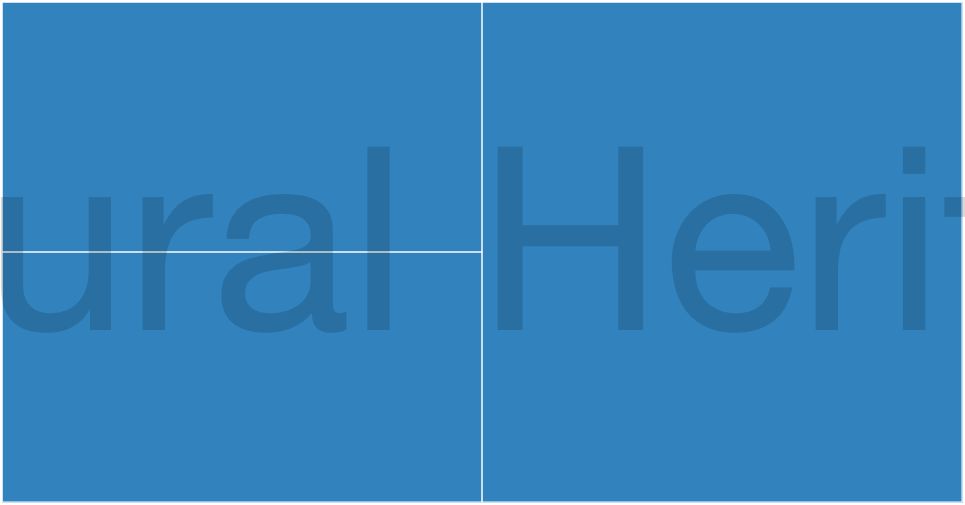

In [80]:
from IPython.display import display
import json


display({"application/vnd.vega.v5+json": json.loads(treemap_test_spec)}, raw=True)

# Summary

This is a doomed attempt to summarise the number of artefacts (see below for definitions) held in UK public collections. Doomed because, to quote from the British Library annual report 23/24 - 'in the absence of a consensus about what constitutes a single item it is not possible to reach a definitive statement of the size of the collection'. Added to that is also what is considered an artefact - are all museum object, all items held in a library, any item in an archive to be counted. Should heritage buildings be counted as well and do we say a castle is one item on par with a manuscript ?

But regardless, as the TaNC report also tried to set out

Definitions (about which we can no doubt all politely argue forever about at some agreeable venue someday):

  * artefacts - the physical *thing* considered to be cultural heritage
  * catalogued record - the inventory level digital catalalogue record for the artefact (for museum, library and archives) or collection of artefacts (for archives)
  * enriched record - the richer (I'm not even going to try give a definition of what richer even means - does fully catalogued mean nothing more can ever be said?) catalogued record for the item (for museum, library and archives) or collection of artefacts (for archives)
  * digitised record - catalogued (enriched or otherwise) and an image (or other media) of the artefact (for museum, library and archives items) 

In these overview pages we givbe various breakdowns of the stats for each of the above and try to tease out
a sunmmary of the state of this in the UK cultural heritage collections. There are then

Summary
  * Overview (artefacts, catalogued records, objects, library, archive)
  * Sub collections records (granual version of above)
  * Sector level records (library,museum,archive)
  * Institution level records (per institution pages)

(we are not breaking down collection into sub collections for artefacts as that's getting too complex and
not really comparable so not useful for data visualisation)
    
Progress (i.e. showing difference between current and previous)
  * Overview Progress - tracking change over time
  * sub collections progress
  * Sector Progress
  * Institution level progress

Uncertainty Level

  * Level 1 - unavoidable inherent uncertainty
  * Level 2 - uncertainty of number of artefacts
  * Level 3 - uncertainty of cataloging type
  * Level 4 - uncertainty of number of records
  * Level 5 - uncertainty of number of published records